This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Working with Keras: A deep dive

## A spectrum of workflows

## Different ways to build Keras models

### The Sequential model

**The `Sequential` class**

In [1]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation="softmax")
])

**Incrementally building a Sequential model**

**sequentail model 만드는 방법 1**

In [2]:
model = keras.Sequential()
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(10, activation="softmax"))

In [3]:
model.layers #어떤 레이어가 붙어있는지 확인인

In [4]:
dir(model) #어떤 레이어를 사용할수 있는지

['_SCALAR_UPRANKING_ON',
 '_TF_MODULE_IGNORED_PROPERTIES',
 '__call__',
 '__class__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_activity_regularizer',
 '_add_trackable',
 '_add_trackable_child',
 '_add_variable_with_custom_getter',
 '_assert_compile_was_called',
 '_assert_weights_created',
 '_auto_config',
 '_auto_get_config',
 '_auto_track_sub_layers',
 '_autocast',
 '_autographed_call',
 '_base_model_initialized',
 '_build_graph_network_for_inferred_shape',
 '_build_input_shape',
 '_call_spec',
 '_callable_losses',
 '_captured_weight_regularizer',
 '_cast_single_input',
 '_check_call_args',
 '_check_sample_wei

**Calling a model for the first time to build it**

In [5]:
model.build(input_shape=(None, 3))
model.weights

[<tf.Variable 'dense_2/kernel:0' shape=(3, 64) dtype=float32, numpy=
 array([[ 0.07305029, -0.00730026,  0.24128735,  0.02893665,  0.29423112,
         -0.10944253,  0.04754078,  0.25725067, -0.28827792,  0.05248681,
         -0.21569076, -0.02997813,  0.22206974,  0.11154157,  0.06811461,
         -0.15822877,  0.25216532, -0.1326191 , -0.22480941, -0.212283  ,
          0.17055789, -0.19111878, -0.17367284,  0.04518548,  0.16021264,
         -0.08832063, -0.23283526, -0.21219811, -0.2881697 ,  0.25516623,
          0.2919656 , -0.00961393, -0.12766452,  0.19775033,  0.01455054,
         -0.29660633,  0.27015668, -0.1039923 ,  0.10282969,  0.0180203 ,
          0.03856015,  0.1441749 ,  0.11812872,  0.26510042, -0.1648257 ,
          0.23130065, -0.19990137, -0.06760526,  0.17233914,  0.09667847,
         -0.26727483, -0.03491423,  0.0524148 , -0.2918486 , -0.14217617,
         -0.1596276 , -0.09772772,  0.23881996,  0.05583313, -0.23191503,
         -0.2188563 , -0.12984097, -0.24746

**The summary method**

In [6]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 64)                256       
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


**Naming models and layers with the `name` argument**

**sequential 모델 만드는 방법 2 (모델에 이름 붙이기)**

In [7]:
model = keras.Sequential(name="my_example_model")
model.add(layers.Dense(64, activation="relu", name="my_first_layer"))
model.add(layers.Dense(10, activation="softmax", name="my_last_layer"))
model.build((None, 3))
model.summary()

Model: "my_example_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_first_layer (Dense)      (None, 64)                256       
                                                                 
 my_last_layer (Dense)       (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


**Specifying the input shape of your model in advance**

**sequential 모델 만드는 방법 3 (input shape 포함)**

In [8]:
model = keras.Sequential()
model.add(keras.Input(shape=(3,)))
model.add(layers.Dense(64, activation="relu"))

In [9]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                256       
                                                                 
Total params: 256
Trainable params: 256
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.add(layers.Dense(10, activation="softmax"))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                256       
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


### The Functional API

#### A simple example

**A simple Functional model with two `Dense` layers**

In [11]:
inputs = keras.Input(shape=(3,), name="my_input") #3차원원
features = layers.Dense(64, activation="relu")(inputs)
outputs = layers.Dense(10, activation="softmax")(features)
model = keras.Model(inputs=inputs, outputs=outputs)

In [12]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_input (InputLayer)       [(None, 3)]               0         
                                                                 
 dense_6 (Dense)             (None, 64)                256       
                                                                 
 dense_7 (Dense)             (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


In [13]:
inputs = keras.Input(shape=(3,), name="my_input")

In [14]:
inputs.shape

TensorShape([None, 3])

In [15]:
inputs.dtype

tf.float32

In [16]:
features = layers.Dense(64, activation="relu")(inputs)

In [17]:
features.shape

TensorShape([None, 64])

In [18]:
outputs = layers.Dense(10, activation="softmax")(features)
model = keras.Model(inputs=inputs, outputs=outputs)

In [19]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_input (InputLayer)       [(None, 3)]               0         
                                                                 
 dense_8 (Dense)             (None, 64)                256       
                                                                 
 dense_9 (Dense)             (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


#### Multi-input, multi-output models

**A multi-input, multi-output Functional model**

In [20]:
vocabulary_size = 10000
num_tags = 100
num_departments = 4 #category

title = keras.Input(shape=(vocabulary_size,), name="title")
text_body = keras.Input(shape=(vocabulary_size,), name="text_body")
tags = keras.Input(shape=(num_tags,), name="tags")

features = layers.Concatenate()([title, text_body, tags])
features = layers.Dense(64, activation="relu")(features)

priority = layers.Dense(1, activation="sigmoid", name="priority")(features)
department = layers.Dense(
    num_departments, activation="softmax", name="department")(features)

model = keras.Model(inputs=[title, text_body, tags], outputs=[priority, department])

In [21]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 title (InputLayer)             [(None, 10000)]      0           []                               
                                                                                                  
 text_body (InputLayer)         [(None, 10000)]      0           []                               
                                                                                                  
 tags (InputLayer)              [(None, 100)]        0           []                               
                                                                                                  
 concatenate (Concatenate)      (None, 20100)        0           ['title[0][0]',                  
                                                                  'text_body[0][0]',        

#### Training a multi-input, multi-output model

**Training a model by providing lists of input & target arrays**

In [22]:
import numpy as np

num_samples = 1280

# dummy input data
title_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
text_body_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
tags_data = np.random.randint(0, 2, size=(num_samples, num_tags))

# dummy target data
priority_data = np.random.random(size=(num_samples, 1))
department_data = np.random.randint(0, 2, size=(num_samples, num_departments))

model.compile(optimizer="rmsprop",
              loss=["mean_squared_error", "categorical_crossentropy"],
              metrics=[["mean_absolute_error"], ["accuracy"]])
model.fit([title_data, text_body_data, tags_data],
          [priority_data, department_data],
          epochs=1)
model.evaluate([title_data, text_body_data, tags_data],
               [priority_data, department_data])
priority_preds, department_preds = model.predict([title_data, text_body_data, tags_data])

40/40 [==============================] - 0s 3ms/step


**Training a model by providing dicts of input & target arrays**

In [23]:
input_data = {"title": title_data, "text_body": text_body_data, "tags": tags_data}

In [24]:
model.compile(optimizer="rmsprop",
              loss={"priority": "mean_squared_error", "department": "categorical_crossentropy"},
              metrics={"priority": ["mean_absolute_error"], "department": ["accuracy"]})
model.fit({"title": title_data, "text_body": text_body_data, "tags": tags_data},
          {"priority": priority_data, "department": department_data},
          epochs=1)
model.evaluate({"title": title_data, "text_body": text_body_data, "tags": tags_data},
               {"priority": priority_data, "department": department_data})
priority_preds, department_preds = model.predict(
    {"title": title_data, "text_body": text_body_data, "tags": tags_data})

40/40 [==============================] - 0s 3ms/step


#### The power of the Functional API: Access to layer connectivity

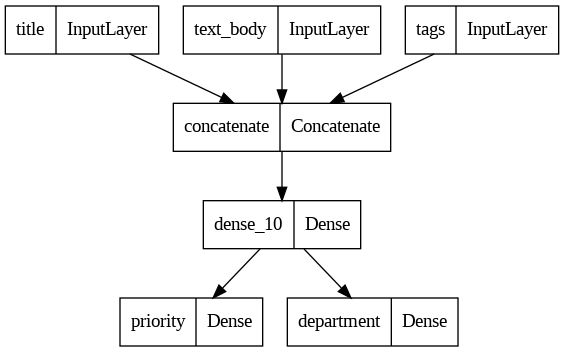

In [25]:
keras.utils.plot_model(model, "ticket_classifier.png")

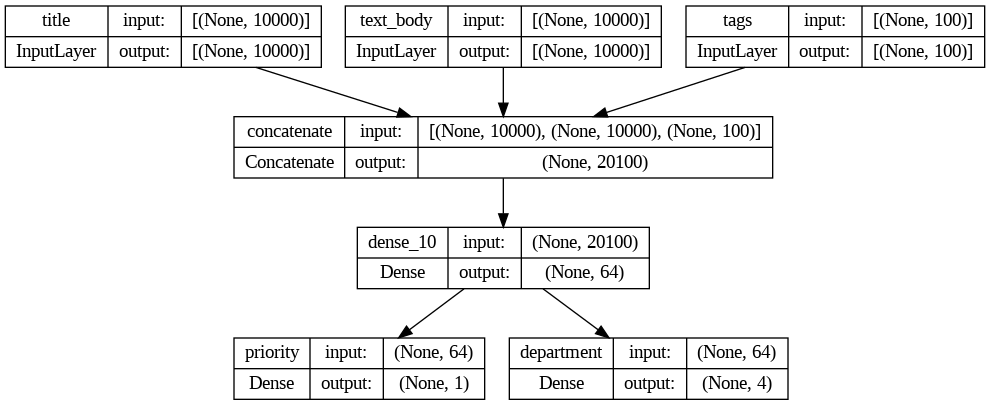

In [26]:
keras.utils.plot_model(model, "ticket_classifier_with_shape_info.png", show_shapes=True)

**Retrieving the inputs or outputs of a layer in a Functional model**

In [27]:
model.layers #모델에 활용되는 레이어

In [28]:
model.layers[3].input

[<KerasTensor: shape=(None, 10000) dtype=float32 (created by layer 'title')>,
 <KerasTensor: shape=(None, 10000) dtype=float32 (created by layer 'text_body')>,
 <KerasTensor: shape=(None, 100) dtype=float32 (created by layer 'tags')>]

In [29]:
model.layers[3].output

<KerasTensor: shape=(None, 20100) dtype=float32 (created by layer 'concatenate')>

**Creating a new model by reusing intermediate layer outputs**

In [30]:
features

<KerasTensor: shape=(None, 64) dtype=float32 (created by layer 'dense_10')>

In [31]:
model.layers[4].output

<KerasTensor: shape=(None, 64) dtype=float32 (created by layer 'dense_10')>

In [32]:
features = model.layers[4].output
difficulty = layers.Dense(3, activation="softmax", name="difficulty")(features)

new_model = keras.Model(
    inputs=[title, text_body, tags],
    outputs=[priority, department, difficulty])

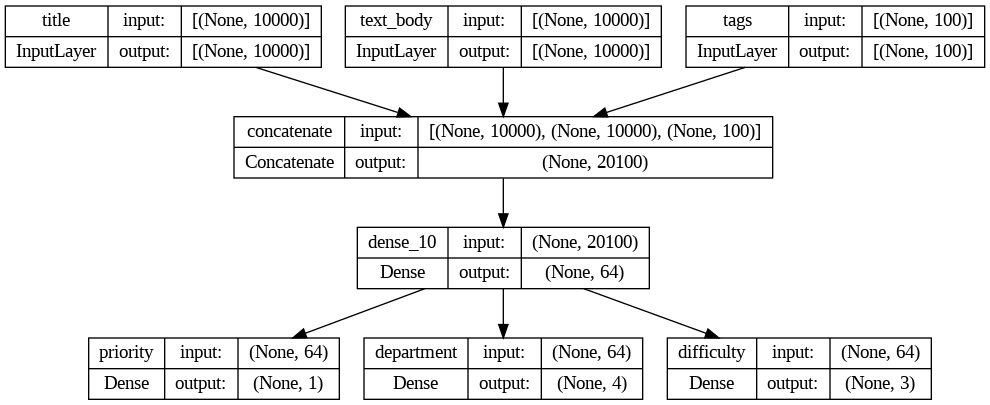

In [33]:
keras.utils.plot_model(new_model, "updated_ticket_classifier.png", show_shapes=True)

### Subclassing the Model class

#### Rewriting our previous example as a subclassed model

**A simple subclassed model**

In [34]:
class CustomerTicketModel(keras.Model):

    def __init__(self, num_departments):
        super().__init__()
        self.concat_layer = layers.Concatenate()
        self.mixing_layer = layers.Dense(64, activation="relu")
        self.priority_scorer = layers.Dense(1, activation="sigmoid")
        self.department_classifier = layers.Dense(
            num_departments, activation="softmax")

    def call(self, inputs):
        title = inputs["title"]
        text_body = inputs["text_body"]
        tags = inputs["tags"]

        features = self.concat_layer([title, text_body, tags])
        features = self.mixing_layer(features)
        priority = self.priority_scorer(features)
        department = self.department_classifier(features)
        return priority, department

In [ ]:
model2 = CustomerTicketModel(num_departments=4)

priority, department = model2(
    {"title": title_data, "text_body": text_body_data, "tags": tags_data})

In [ ]:
model2

In [ ]:
emodel = CustomerTicketModel(num_departments=4)

priority, department = model(
    {"title": title_data, "text_body": text_body_data, "tags": tags_data})

In [ ]:
model.compile(optimizer="rmsprop",
              loss=["mean_squared_error", "categorical_crossentropy"],
              metrics=[["mean_absolute_error"], ["accuracy"]])
model.fit({"title": title_data,
           "text_body": text_body_data,
           "tags": tags_data},
          [priority_data, department_data],
          epochs=1)
model.evaluate({"title": title_data,
                "text_body": text_body_data,
                "tags": tags_data},
               [priority_data, department_data])
priority_preds, department_preds = model.predict({"title": title_data,
                                                  "text_body": text_body_data,
                                                  "tags": tags_data})

40/40 [==============================] - 0s 3ms/step


In [ ]:
keras.utils.plot_model(model2, "updated_ticket_classifier.png", show_shapes=True)
#그림은 functinal api만 그려짐

NameError: ignored

#### Beware: What subclassed models don't support

### Mixing and matching different components

**Creating a Functional model that includes a subclassed model**

In [ ]:
class Classifier(keras.Model):

    def __init__(self, num_classes=2):
        super().__init__()
        if num_classes == 2:
            num_units = 1
            activation = "sigmoid"
        else:
            num_units = num_classes
            activation = "softmax"
        self.dense = layers.Dense(num_units, activation=activation)

    def call(self, inputs):
        return self.dense(inputs)

inputs = keras.Input(shape=(3,))
features = layers.Dense(64, activation="relu")(inputs)
outputs = Classifier(num_classes=10)(features)
model = keras.Model(inputs=inputs, outputs=outputs)

**Creating a subclassed model that includes a Functional model**

In [ ]:
inputs = keras.Input(shape=(64,))
outputs = layers.Dense(1, activation="sigmoid")(inputs)
binary_classifier = keras.Model(inputs=inputs, outputs=outputs)

class MyModel(keras.Model):

    def __init__(self, num_classes=2):
        super().__init__()
        self.dense = layers.Dense(64, activation="relu")
        self.classifier = binary_classifier

    def call(self, inputs):
        features = self.dense(inputs)
        return self.classifier(features)

model = MyModel()

### Remember: Use the right tool for the job

## Using built-in training and evaluation loops

**The standard workflow: `compile()`, `fit()`, `evaluate()`, `predict()`**

In [37]:
from tensorflow.keras.datasets import mnist

def get_mnist_model():
    inputs = keras.Input(shape=(28 * 28,))
    features = layers.Dense(512, activation="relu")(inputs)
    features = layers.Dropout(0.5)(features)
    outputs = layers.Dense(10, activation="softmax")(features)
    model = keras.Model(inputs, outputs)
    return model

(images, labels), (test_images, test_labels) = mnist.load_data()
images = images.reshape((60000, 28 * 28)).astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28)).astype("float32") / 255
train_images, val_images = images[10000:], images[:10000]
train_labels, val_labels = labels[10000:], labels[:10000]

model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=3,
          validation_data=(val_images, val_labels))
test_metrics = model.evaluate(test_images, test_labels)
predictions = model.predict(test_images)

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/3
1563/1563 [==============================] - 7s 4ms/step - loss: 0.2954 - accuracy: 0.9123 - val_loss: 0.1444 - val_accuracy: 0.9578
Epoch 2/3
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1641 - accuracy: 0.9527 - val_loss: 0.1140 - val_accuracy: 0.9665
Epoch 3/3
313/313 [==============================] - 0s 1ms/step


### Writing your own metrics

**Implementing a custom metric by subclassing the `Metric` class**

In [39]:
import tensorflow as tf

class RootMeanSquaredError(keras.metrics.Metric):

    def __init__(self, name="rmse", **kwargs):
        super().__init__(name=name, **kwargs)
        self.mse_sum = self.add_weight(name="mse_sum", initializer="zeros")
        self.total_samples = self.add_weight(
            name="total_samples", initializer="zeros", dtype="int32")

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true = tf.one_hot(y_true, depth=tf.shape(y_pred)[1])
        mse = tf.reduce_sum(tf.square(y_true - y_pred))
        self.mse_sum.assign_add(mse)
        num_samples = tf.shape(y_pred)[0]
        self.total_samples.assign_add(num_samples)

    def result(self):
        return tf.sqrt(self.mse_sum / tf.cast(self.total_samples, tf.float32))

    def reset_state(self):
        self.mse_sum.assign(0.)
        self.total_samples.assign(0)

In [40]:
model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy", RootMeanSquaredError()])
model.fit(train_images, train_labels,
          epochs=3,
          validation_data=(val_images, val_labels))
test_metrics = model.evaluate(test_images, test_labels)

Epoch 1/3
1563/1563 [==============================] - 7s 4ms/step - loss: 0.2925 - accuracy: 0.9131 - rmse: 7.1766 - val_loss: 0.1404 - val_accuracy: 0.9594 - val_rmse: 7.3468
Epoch 2/3
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1601 - accuracy: 0.9539 - rmse: 7.3494 - val_loss: 0.1112 - val_accuracy: 0.9690 - val_rmse: 7.4027
Epoch 3/3
313/313 [==============================] - 1s 2ms/step - loss: 0.0911 - accuracy: 0.9743 - rmse: 7.4353


### Using callbacks

#### The EarlyStopping and ModelCheckpoint callbacks

**Using the `callbacks` argument in the `fit()` method**

**callback 사용 : early stopping, model checkpoint**

In [35]:
keras.callbacks.EarlyStopping?

In [41]:
callbacks_list = [
    keras.callbacks.EarlyStopping(
        monitor="val_accuracy",
        patience=2, # val_accuracy가 2번이상 나빠지면 early stopping사용
    ),
    keras.callbacks.ModelCheckpoint(
        filepath="checkpoint_path.keras", #path to the destination model file
        monitor="val_loss",
        save_best_only=True, # epoch=10 번동안 val_loss 제일 좋은거 뽑기
    )
]
model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          callbacks=callbacks_list,
          validation_data=(val_images, val_labels))

Epoch 1/10
1563/1563 [==============================] - 6s 3ms/step - loss: 0.2948 - accuracy: 0.9125 - val_loss: 0.1375 - val_accuracy: 0.9596
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1574 - accuracy: 0.9537 - val_loss: 0.1129 - val_accuracy: 0.9683
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1287 - accuracy: 0.9633 - val_loss: 0.0989 - val_accuracy: 0.9734
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1136 - accuracy: 0.9685 - val_loss: 0.0952 - val_accuracy: 0.9759
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1045 - accuracy: 0.9717 - val_loss: 0.0950 - val_accuracy: 0.9766
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0952 - accuracy: 0.9744 - val_loss: 0.0892 - val_accuracy: 0.9780
Epoch 7/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.0869 - accuracy: 0.9760 - val_loss: 0.1018 - val_accuracy:

In [42]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [43]:
model = keras.models.load_model("checkpoint_path.keras") #가장 좋은거 뽑은 모델 불러오기

### Writing your own callbacks

**Creating a custom callback by subclassing the `Callback` class**

In [44]:
from matplotlib import pyplot as plt

class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs):
        self.per_batch_losses = []

    def on_batch_end(self, batch, logs):
        self.per_batch_losses.append(logs.get("loss"))

    def on_epoch_end(self, epoch, logs):
        plt.clf()
        plt.plot(range(len(self.per_batch_losses)), self.per_batch_losses,
                 label="Training loss for each batch")
        plt.xlabel(f"Batch (epoch {epoch})")
        plt.ylabel("Loss")
        plt.legend()
        plt.savefig(f"plot_at_epoch_{epoch}")
        self.per_batch_losses = []

Epoch 1/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.2958 - accuracy: 0.9115 - val_loss: 0.1452 - val_accuracy: 0.9582
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1603 - accuracy: 0.9543 - val_loss: 0.1273 - val_accuracy: 0.9646
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1319 - accuracy: 0.9619 - val_loss: 0.0987 - val_accuracy: 0.9729
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1121 - accuracy: 0.9688 - val_loss: 0.0940 - val_accuracy: 0.9747
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1069 - accuracy: 0.9711 - val_loss: 0.0941 - val_accuracy: 0.9743
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0987 - accuracy: 0.9729 - val_loss: 0.0874 - val_accuracy: 0.9785
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0893 - accuracy: 0.9757 - val_loss: 0.0905 - val_accuracy:

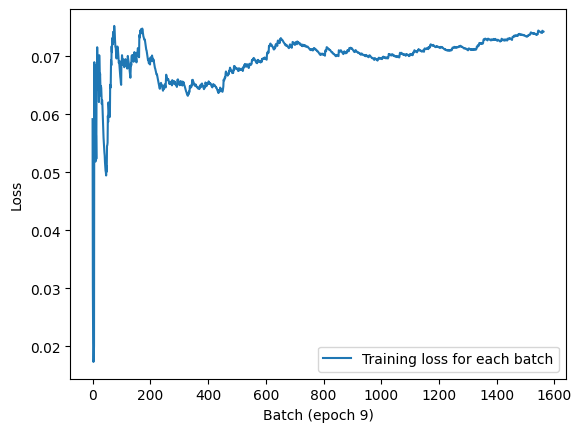

In [45]:

model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          callbacks=[LossHistory()],
          validation_data=(val_images, val_labels))

### Monitoring and visualization with TensorBoard

In [47]:
model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

tensorboard = keras.callbacks.TensorBoard(
    log_dir="/full_path_to_your_log_dir",
)
model.fit(train_images, train_labels,
          epochs=10,
          validation_data=(val_images, val_labels),
          callbacks=[tensorboard])

Epoch 1/10
1563/1563 [==============================] - 6s 3ms/step - loss: 0.2937 - accuracy: 0.9132 - val_loss: 0.1546 - val_accuracy: 0.9552
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1579 - accuracy: 0.9544 - val_loss: 0.1174 - val_accuracy: 0.9677
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1325 - accuracy: 0.9624 - val_loss: 0.1066 - val_accuracy: 0.9709
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1166 - accuracy: 0.9671 - val_loss: 0.1030 - val_accuracy: 0.9734
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1067 - accuracy: 0.9705 - val_loss: 0.0993 - val_accuracy: 0.9753
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0949 - accuracy: 0.9735 - val_loss: 0.0930 - val_accuracy: 0.9767
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0896 - accuracy: 0.9756 - val_loss: 0.0887 - val_accuracy:

In [ ]:
%load_ext tensorboard
%tensorboard --logdir /full_path_to_your_log_dir

## Writing your own training and evaluation loops

### Training versus inference

### Low-level usage of metrics

In [ ]:
metric = keras.metrics.SparseCategoricalAccuracy()
targets = [0, 1, 2]
predictions = [[1, 0, 0], [0, 1, 0], [0, 0, 1]]
metric.update_state(targets, predictions)
current_result = metric.result()
print(f"result: {current_result:.2f}")

result: 1.00


In [ ]:
metric = keras.metrics.SparseCategoricalAccuracy()
targets = [0, 1, 1]
predictions = [[1, 0, 0], [0, 1, 0], [0, 0, 1]]
metric.update_state(targets, predictions)
current_result = metric.result()
print(f"result: {current_result:.2f}")

result: 0.67


In [ ]:
values = [0, 1, 2, 3, 4]
mean_tracker = keras.metrics.Mean()
for value in values:
    mean_tracker.update_state(value)
print(f"Mean of values: {mean_tracker.result():.2f}")

Mean of values: 2.00


### A complete training and evaluation loop

**Writing a step-by-step training loop: the training step function**

In [ ]:
model = get_mnist_model()

loss_fn = keras.losses.SparseCategoricalCrossentropy()
optimizer = keras.optimizers.RMSprop()
metrics = [keras.metrics.SparseCategoricalAccuracy()]
loss_tracking_metric = keras.metrics.Mean()

def train_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs, training=True)
        loss = loss_fn(targets, predictions)
    gradients = tape.gradient(loss, model.trainable_weights)
    optimizer.apply_gradients(zip(gradients, model.trainable_weights))

    logs = {}
    for metric in metrics:
        metric.update_state(targets, predictions)
        logs[metric.name] = metric.result()

    loss_tracking_metric.update_state(loss)
    logs["loss"] = loss_tracking_metric.result()
    return logs

**Writing a step-by-step training loop: resetting the metrics**

In [ ]:
def reset_metrics():
    for metric in metrics:
        metric.reset_state()
    loss_tracking_metric.reset_state()

**Writing a step-by-step training loop: the loop itself**

In [ ]:
training_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
training_dataset = training_dataset.batch(32)
epochs = 3
for epoch in range(epochs):
    reset_metrics()
    for inputs_batch, targets_batch in training_dataset:
        logs = train_step(inputs_batch, targets_batch)
    print(f"Results at the end of epoch {epoch}")
    for key, value in logs.items():
        print(f"...{key}: {value:.4f}")

Results at the end of epoch 0
...sparse_categorical_accuracy: 0.9134
...loss: 0.2935
Results at the end of epoch 1
...sparse_categorical_accuracy: 0.9531
...loss: 0.1599
Results at the end of epoch 2
...sparse_categorical_accuracy: 0.9639
...loss: 0.1292


**Writing a step-by-step evaluation loop**

In [ ]:
def test_step(inputs, targets):
    predictions = model(inputs, training=False)
    loss = loss_fn(targets, predictions)

    logs = {}
    for metric in metrics:
        metric.update_state(targets, predictions)
        logs["val_" + metric.name] = metric.result()

    loss_tracking_metric.update_state(loss)
    logs["val_loss"] = loss_tracking_metric.result()
    return logs

val_dataset = tf.data.Dataset.from_tensor_slices((val_images, val_labels))
val_dataset = val_dataset.batch(32)
reset_metrics()
for inputs_batch, targets_batch in val_dataset:
    logs = test_step(inputs_batch, targets_batch)
print("Evaluation results:")
for key, value in logs.items():
    print(f"...{key}: {value:.4f}")

### Make it fast with tf.function

**Adding a `tf.function` decorator to our evaluation-step function**

In [ ]:
@tf.function
def test_step(inputs, targets):
    predictions = model(inputs, training=False)
    loss = loss_fn(targets, predictions)

    logs = {}
    for metric in metrics:
        metric.update_state(targets, predictions)
        logs["val_" + metric.name] = metric.result()

    loss_tracking_metric.update_state(loss)
    logs["val_loss"] = loss_tracking_metric.result()
    return logs

val_dataset = tf.data.Dataset.from_tensor_slices((val_images, val_labels))
val_dataset = val_dataset.batch(32)
reset_metrics()
for inputs_batch, targets_batch in val_dataset:
    logs = test_step(inputs_batch, targets_batch)
print("Evaluation results:")
for key, value in logs.items():
    print(f"...{key}: {value:.4f}")

### Leveraging fit() with a custom training loop

**Implementing a custom training step to use with `fit()`**

In [ ]:
loss_fn = keras.losses.SparseCategoricalCrossentropy()
loss_tracker = keras.metrics.Mean(name="loss")

class CustomModel(keras.Model):
    def train_step(self, data):
        inputs, targets = data
        with tf.GradientTape() as tape:
            predictions = self(inputs, training=True)
            loss = loss_fn(targets, predictions)
        gradients = tape.gradient(loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(gradients, self.trainable_weights))

        loss_tracker.update_state(loss)
        return {"loss": loss_tracker.result()}

    @property
    def metrics(self):
        return [loss_tracker]

In [ ]:
inputs = keras.Input(shape=(28 * 28,))
features = layers.Dense(512, activation="relu")(inputs)
features = layers.Dropout(0.5)(features)
outputs = layers.Dense(10, activation="softmax")(features)
model = CustomModel(inputs, outputs)

model.compile(optimizer=keras.optimizers.RMSprop())
model.fit(train_images, train_labels, epochs=3)

In [ ]:
class CustomModel(keras.Model):
    def train_step(self, data):
        inputs, targets = data
        with tf.GradientTape() as tape:
            predictions = self(inputs, training=True)
            loss = self.compiled_loss(targets, predictions)
        gradients = tape.gradient(loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(gradients, self.trainable_weights))
        self.compiled_metrics.update_state(targets, predictions)
        return {m.name: m.result() for m in self.metrics}

In [ ]:
inputs = keras.Input(shape=(28 * 28,))
features = layers.Dense(512, activation="relu")(inputs)
features = layers.Dropout(0.5)(features)
outputs = layers.Dense(10, activation="softmax")(features)
model = CustomModel(inputs, outputs)

model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=[keras.metrics.SparseCategoricalAccuracy()])
model.fit(train_images, train_labels, epochs=3)

## Summary